In [36]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('train_iris.csv')
test_data = pd.read_csv('test_iris.csv')

In [4]:
train_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [27]:
X_train = train_data.drop(['Unnamed: 0', 'species'], axis=1)
y_train = train_data.species

In [28]:
X_test = test_data.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test_data.species

In [29]:
max_depth_values = range(1, 100)

In [9]:
scores_data = pd.DataFrame()

In [22]:
from sklearn.metrics import accuracy_score

In [37]:
np.random.seed(0)

In [41]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    # mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
        var_name='set_type', value_name='score')

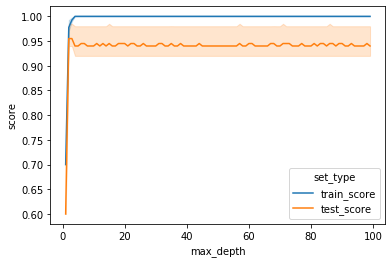

In [43]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")